*The Bank Churners Dataset had been cleaned and pre processed for the Model Building and Tuning in the first file.*

In [1]:
# Importing Required Libraries

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

Read the Transformed Dataset -

In [2]:
df = pd.read_csv('BankChurners_Transformed.csv')
df.head()

,Unnamed: 0,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Target
0,0,768805383,0.404255,1,3,3,1,2,0,0.604651,5,1,3,0.776815,0.308701,0.870149,0.626892,0.269847,0.248062,0.661463,0.061061,0
1,1,818770008,0.489362,0,5,2,2,4,0,0.720930,6,1,2,0.659345,0.343266,0.813340,0.673525,0.307709,0.178295,1.000000,0.105105,0
2,2,713982108,0.531915,1,3,2,1,3,0,0.534884,4,1,0,0.367812,0.000000,0.723401,0.873851,0.422582,0.077519,0.792568,0.000000,0
3,3,769911858,0.297872,0,4,3,3,4,0,0.488372,3,4,1,0.356082,1.000000,0.559588,0.643118,0.277202,0.077519,0.792568,0.760761,0
4,4,709106358,0.297872,1,3,5,1,2,0,0.186047,5,1,0,0.482879,0.000000,0.760658,0.800169,0.160625,0.139535,0.820444,0.000000,0


In [3]:
# Dropping the first two columns as the first column indicates the Index of the Dataframe which is transformed, 
# and the second column had the CLIENNUM values which is unique to every data point and wont be useful for us to the further 
# steps of analysis.

df.drop(['Unnamed: 0','CLIENTNUM'], axis=1, inplace=True)

In [4]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Target
0,0.404255,1,3,3,1,2,0,0.604651,5,1,3,0.776815,0.308701,0.870149,0.626892,0.269847,0.248062,0.661463,0.061061,0
1,0.489362,0,5,2,2,4,0,0.720930,6,1,2,0.659345,0.343266,0.813340,0.673525,0.307709,0.178295,1.000000,0.105105,0
2,0.531915,1,3,2,1,3,0,0.534884,4,1,0,0.367812,0.000000,0.723401,0.873851,0.422582,0.077519,0.792568,0.000000,0
3,0.297872,0,4,3,3,4,0,0.488372,3,4,1,0.356082,1.000000,0.559588,0.643118,0.277202,0.077519,0.792568,0.760761,0
4,0.297872,1,3,5,1,2,0,0.186047,5,1,0,0.482879,0.000000,0.760658,0.800169,0.160625,0.139535,0.820444,0.000000,0


# MODEL SELECTION AND VALIDATION

## STEP - 1 - Build different types of Models using different techniques for the Base Model to compare the performance of the models on the transformed dataset.

**Creating Score Card to log results of all models**

In [5]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'Cohen-Kappa Score','AUC Score','f1-score'])

# print the score card
score_card

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score


#### TRAIN-TEST SPLIT 

**Splitting the Dataset into Dependent & Independent Features**

In [6]:
X = df.drop('Target', axis=1)
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.404255,1,3,3,1,2,0,0.604651,5,1,3,0.776815,0.308701,0.870149,0.626892,0.269847,0.248062,0.661463,0.061061
1,0.489362,0,5,2,2,4,0,0.720930,6,1,2,0.659345,0.343266,0.813340,0.673525,0.307709,0.178295,1.000000,0.105105
2,0.531915,1,3,2,1,3,0,0.534884,4,1,0,0.367812,0.000000,0.723401,0.873851,0.422582,0.077519,0.792568,0.000000
3,0.297872,0,4,3,3,4,0,0.488372,3,4,1,0.356082,1.000000,0.559588,0.643118,0.277202,0.077519,0.792568,0.760761
4,0.297872,1,3,5,1,2,0,0.186047,5,1,0,0.482879,0.000000,0.760658,0.800169,0.160625,0.139535,0.820444,0.000000


In [7]:
y = df['Target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

**Splitting the Dataset into a 70:30 Ratio for Training and Testing respectively**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

In [9]:
# Check size of the Train and Test splits

print('Size of X_train =', X_train.shape)
print('Size of X_test =', X_test.shape)
print('Size of y_train =', y_train.shape)
print('Size of y_test =', y_test.shape)

Size of X_train = (7088, 19)
Size of X_test = (3039, 19)
Size of y_train = (7088,)
Size of y_test = (3039,)


# 1. Logistic Regression Model

In [10]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.219086
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 7088
Model:                          Logit   Df Residuals:                     7069
Method:                           MLE   Df Model:                           18
Date:                Fri, 10 Mar 2023   Pseudo R-squ.:                  0.5012
Time:                        19:41:19   Log-Likelihood:                -1552.9
converged:                       True   LL-Null:                       -3112.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Customer_Age                 0.7366      0.456      1.614      0.107      -0.158

In [11]:
# Overall Significance of the Model
logreg_model_sig = logreg.llr_pvalue
print('Overall Significance of the Model =', logreg_model_sig)

# pseudo r2
# Mcfadden R2 1- llf/llr
logreg_mcf_r2 = 1-(logreg.llf/logreg.llnull)  
print("McFadden's R-squared of the Model =", logreg_mcf_r2)
# we want  llf to be much smaller in magnitude than llnull
# with sign llf will be larger than llnull
# Mcfadden r2 should be closer to 1 for a good model 

# 'aic' retuns the AIC value for the model
# It gives a trade-off between model accuracy and model complexity.
logreg_aic = logreg.aic
print('AIC:', logreg_aic)

Overall Significance of the Model = 0.0
McFadden's R-squared of the Model = 0.5011510298633766
AIC: 3143.762571345263


**Inferences**

- The model is significant.
- The Mcfadden r2 value is 0.51, which suggests that we can still improve the model.
- The Akaike information criterion (AIC) Score of the model is 3288.16

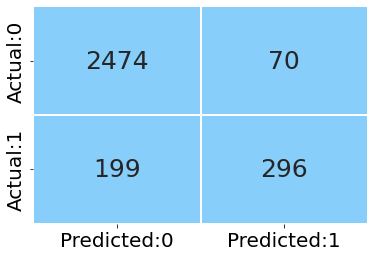

Precision =  0.8087431693989071
Recall = 0.597979797979798
Specificity = 0.9724842767295597
FPR = 0.027515723270440252
F1-Score = 0.6875725900116144
Accuracy = 0.9114840408028957
kappa value: 0.6373538919342625
AUC Score = 0.7852320373546788
Classification Report :
              precision    recall  f1-score   support

 not churned       0.93      0.97      0.95      2544
     churned       0.81      0.60      0.69       495

    accuracy                           0.91      3039
   macro avg       0.87      0.79      0.82      3039
weighted avg       0.91      0.91      0.91      3039



In [12]:
# Do Prediction on the Test Set
y_pred_logreg = logreg.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred_logreg = [ 0 if x < 0.5 else 1 for x in y_pred_logreg]

# Plot the Confusion Matrix
cnf_matrix_logreg = metrics.confusion_matrix(y_test, y_pred_logreg)

conf_matrix = pd.DataFrame(data = cnf_matrix_logreg,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_logreg[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_logreg[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_logreg[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cnf_matrix_logreg[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa_logreg = cohen_kappa_score(y_test, y_pred_logreg)
print('kappa value:',kappa_logreg)

# AUC Score
auc = roc_auc_score(y_test, y_pred_logreg)
print('AUC Score =', auc)

# Classification Report
logreg_class_report = classification_report(y_test, y_pred_logreg, target_names=['not churned', 'churned'])
print('Classification Report :')
print(logreg_class_report)

In [13]:
# compile the required information
logreg_basemodel_metrics = pd.Series({
                     'Model_Name': "Logistic Regression Base Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa_logreg,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(logreg_basemodel_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Base Model,0.911484,0.808743,0.597980,0.972484,0.637354,0.785232,0.687573


# 2. K Nearest Neighbors (KNN) Model

In [14]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

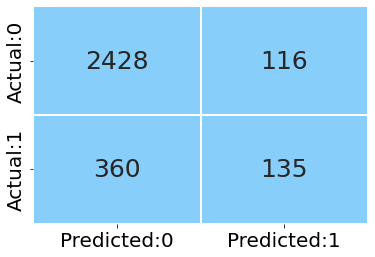

Precision =  0.5378486055776892
Recall = 0.2727272727272727
Specificity = 0.9544025157232704
FPR = 0.04559748427672956
F1-Score = 0.3619302949061662
Accuracy = 0.8433695294504772
kappa value: 0.2833839623819233
AUC Score = 0.6135648942252716
Classification Report :
              precision    recall  f1-score   support

 not churned       0.87      0.95      0.91      2544
     churned       0.54      0.27      0.36       495

    accuracy                           0.84      3039
   macro avg       0.70      0.61      0.64      3039
weighted avg       0.82      0.84      0.82      3039



In [15]:
# Do Prediction on the Test Set
y_pred_knn = knn_model.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred_knn = [ 0 if x < 0.5 else 1 for x in y_pred_knn]

# Plot the Confusion Matrix
cnf_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)

conf_matrix = pd.DataFrame(data = cnf_matrix_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_knn[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_knn[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_knn[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_knn[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa_knn = cohen_kappa_score(y_test, y_pred_knn)
print('kappa value:',kappa_knn)

# AUC Score
auc = roc_auc_score(y_test, y_pred_knn)
print('AUC Score =', auc)

# Classification Report
knn_class_report = classification_report(y_test, y_pred_knn, target_names=['not churned', 'churned'])
print('Classification Report :')
print(knn_class_report)

In [16]:
# compile the required information
knn_basemodel_metrics = pd.Series({
                     'Model_Name': "KNN Base Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa_knn,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(knn_basemodel_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Base Model,0.911484,0.808743,0.597980,0.972484,0.637354,0.785232,0.687573
1,KNN Base Model,0.843370,0.537849,0.272727,0.954403,0.283384,0.613565,0.361930


# 3. Decision Tree Classifier Model

In [17]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree_model = decision_tree_classification.fit(X_train, y_train)

Plot a decision tree.

To visualize our decision tree we will use 'plot_tree'

Churned - 1 and Not Churned - 0 The subset sample keeps deceasing as we go into the depth of Tree.

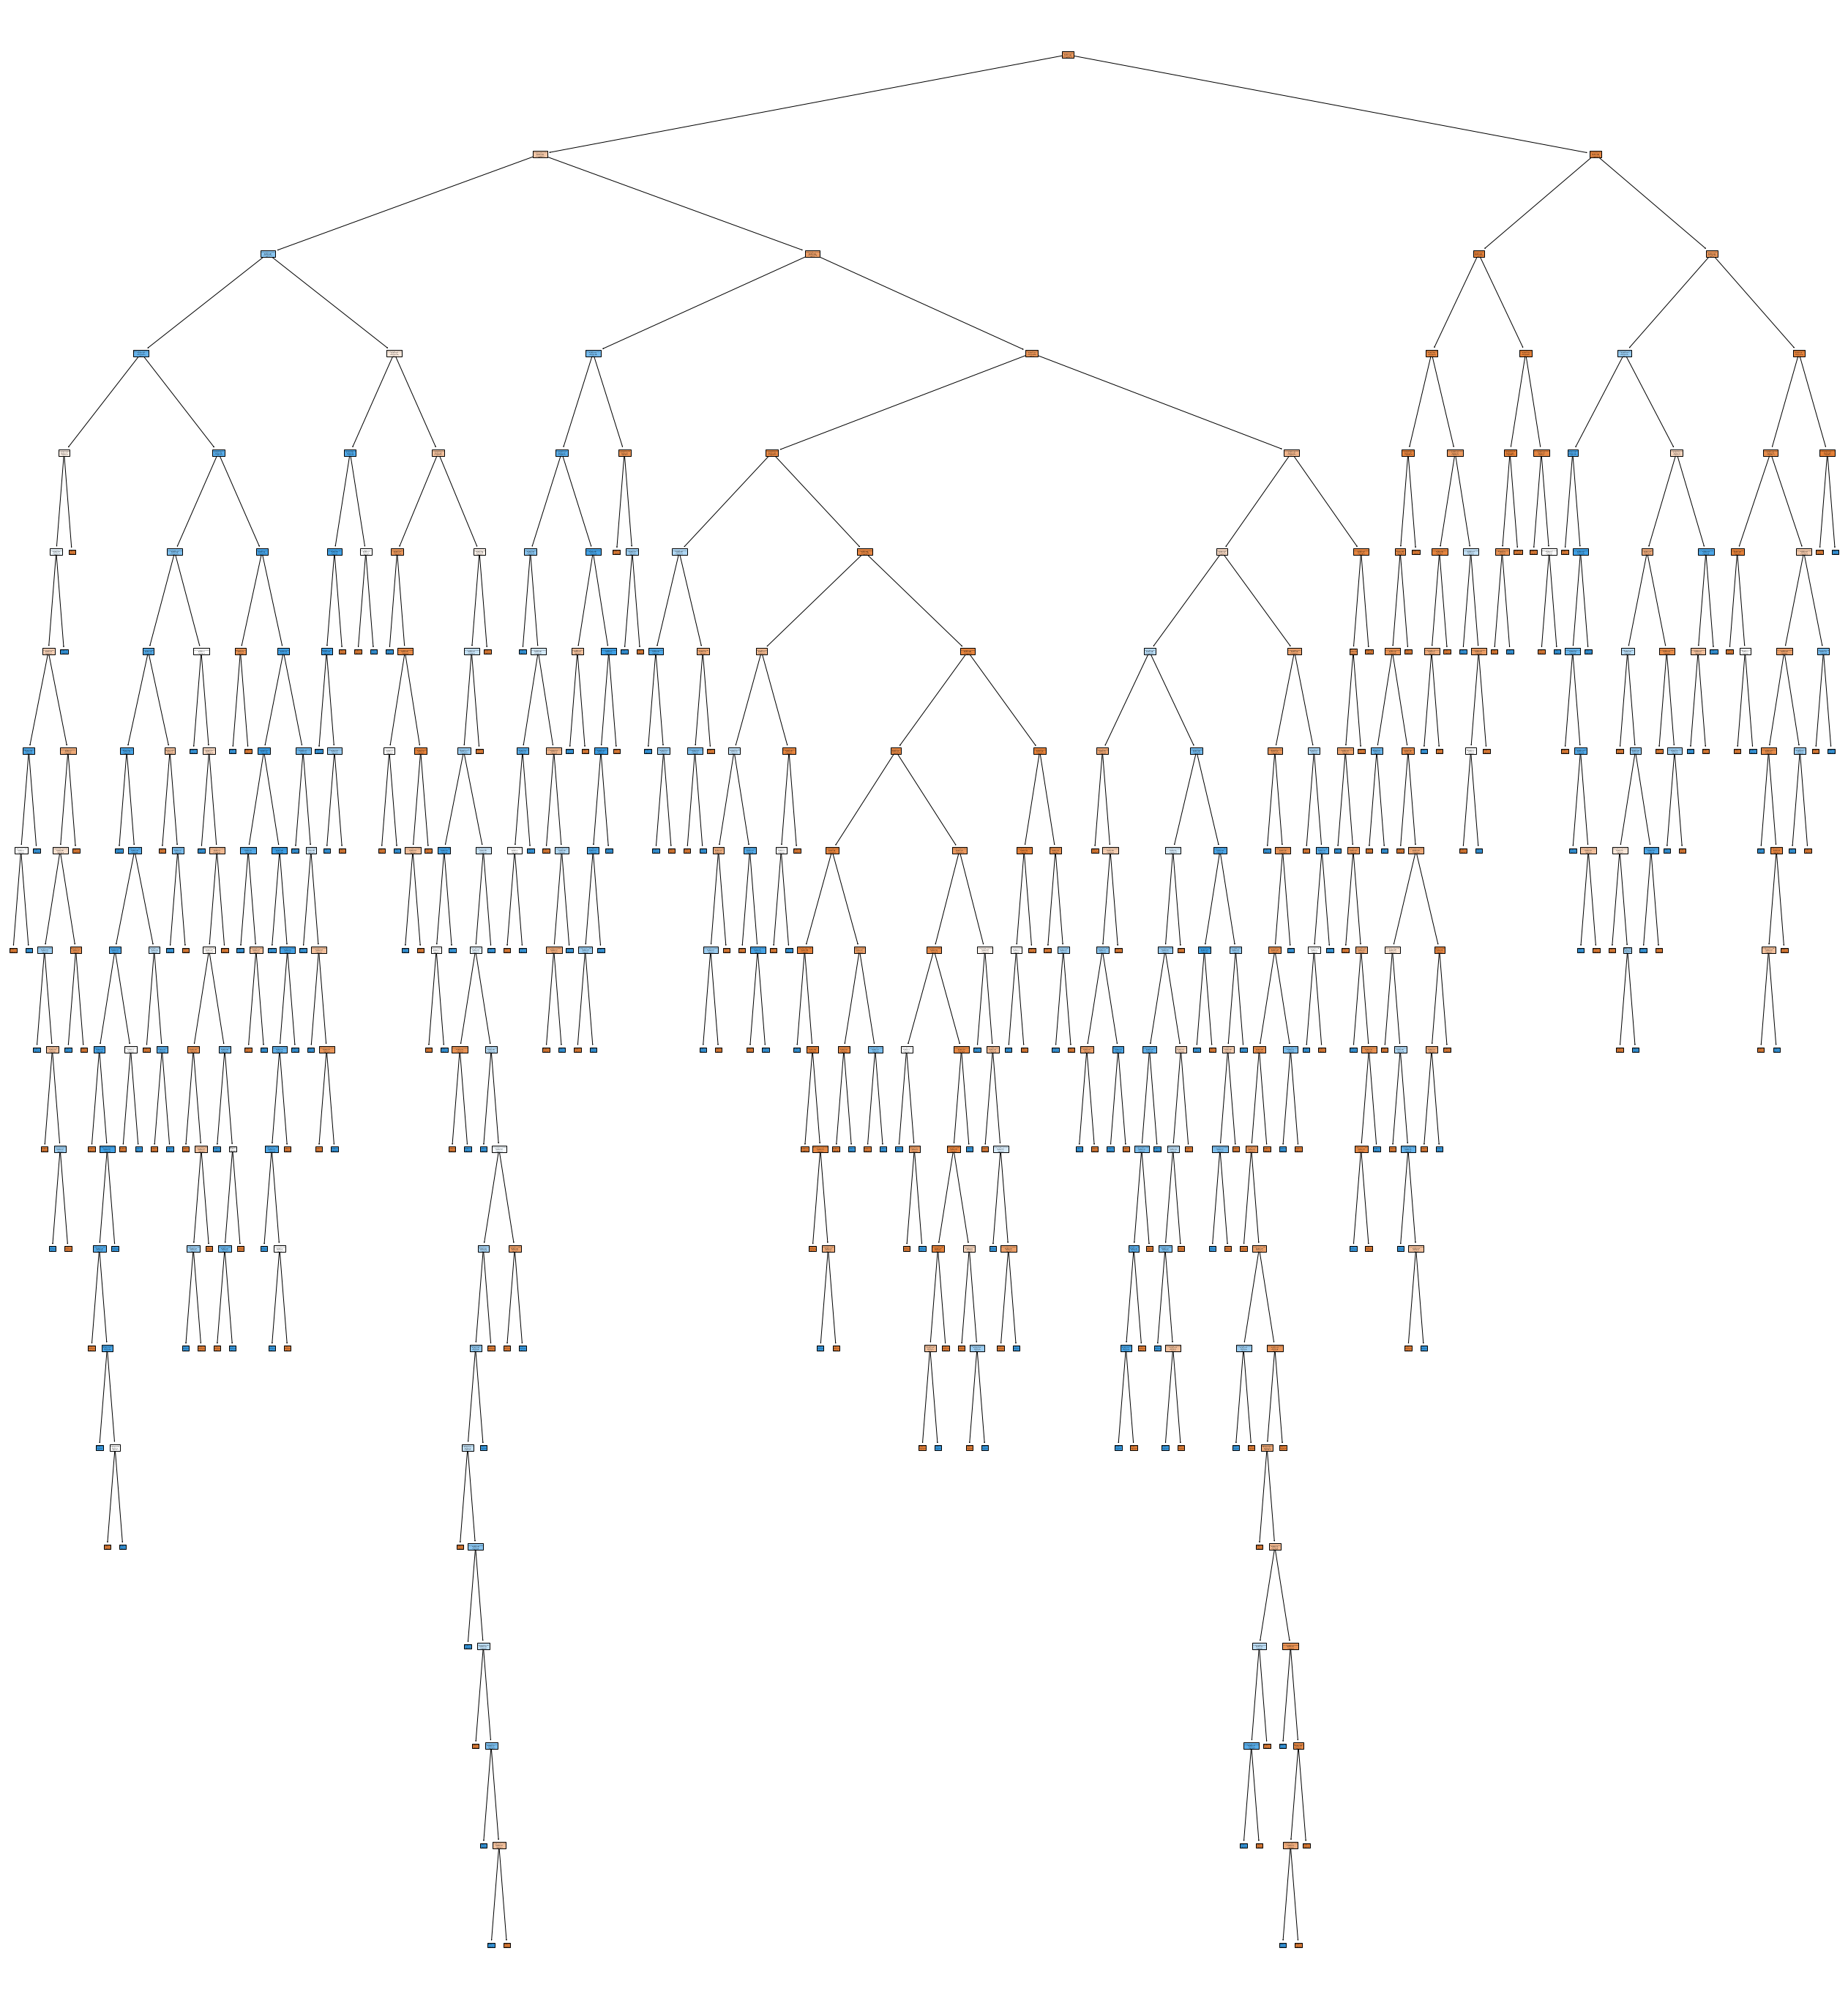

In [18]:
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(decision_tree_model,
                   feature_names=X_train.columns,  
                   class_names=["0","1"],
                   filled=True) # it gives all the nodes in the color. If this is false then all of them will be in white

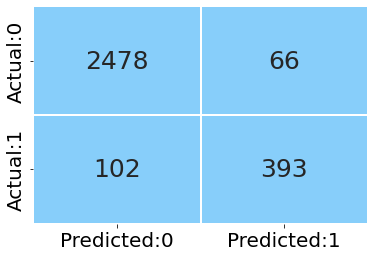

Precision =  0.6716417910447762
Recall = 0.569620253164557
Specificity = 0.9740566037735849
FPR = 0.025943396226415096
F1-Score = 0.6164383561643836
Accuracy = 0.9395900755124056
Cohen Kappa Score = 0.7911678520416427
AUC Score = 0.8839979988564894
Classification Report :
              precision    recall  f1-score   support

 not churned       0.96      0.97      0.97      2544
     churned       0.86      0.79      0.82       495

    accuracy                           0.94      3039
   macro avg       0.91      0.88      0.90      3039
weighted avg       0.94      0.94      0.94      3039



In [19]:
# Do Prediction on the Test Set
y_pred_tree = decision_tree_model.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred_tree = [ 0 if x < 0.5 else 1 for x in y_pred_tree]

# Plot the Confusion Matrix
cnf_matrix_tree = metrics.confusion_matrix(y_test, y_pred_tree)

conf_matrix = pd.DataFrame(data = cnf_matrix_tree,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_tree[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_knn[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_tree[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_tree[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa_tree = cohen_kappa_score(y_test, y_pred_tree)
print('Cohen Kappa Score =', kappa_tree)

# AUC Score
auc = roc_auc_score(y_test, y_pred_tree)
print('AUC Score =', auc)

# Classification Report
tree_class_report = classification_report(y_test, y_pred_tree, target_names=['not churned', 'churned'])
print('Classification Report :')
print(tree_class_report)

In [20]:
# compile the required information
dec_tree_basemodel_metrics = pd.Series({
                     'Model_Name': "Decision Tree Base Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa_tree,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(dec_tree_basemodel_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Base Model,0.911484,0.808743,0.597980,0.972484,0.637354,0.785232,0.687573
1,KNN Base Model,0.843370,0.537849,0.272727,0.954403,0.283384,0.613565,0.361930
2,Decision Tree Base Model,0.939590,0.671642,0.569620,0.974057,0.791168,0.883998,0.616438


# 4. Random Forest Classification Model

In [21]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

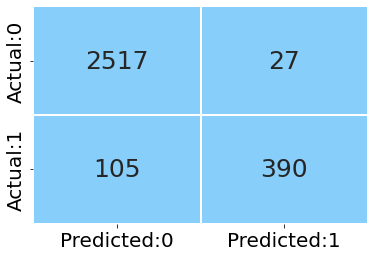

Precision =  0.935251798561151
Recall = 0.7878787878787878
Specificity = 0.9893867924528302
FPR = 0.01061320754716981
F1-Score = 0.8552631578947368
Accuracy = 0.9565646594274433
Cohen Kappa Score = 0.8299310902694577
AUC Score = 0.8886327901658091
Classification Report :
              precision    recall  f1-score   support

 not churned       0.96      0.99      0.97      2544
     churned       0.94      0.79      0.86       495

    accuracy                           0.96      3039
   macro avg       0.95      0.89      0.91      3039
weighted avg       0.96      0.96      0.96      3039



In [22]:
# Do Prediction on the Test Set
y_pred_rf = rf_model.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred_rf = [ 0 if x < 0.5 else 1 for x in y_pred_rf]

# Plot the Confusion Matrix
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)

conf_matrix = pd.DataFrame(data = cnf_matrix_rf,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_rf[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_rf[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_rf[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_rf[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
print('Cohen Kappa Score =', kappa_rf)

# AUC Score
auc = roc_auc_score(y_test, y_pred_rf)
print('AUC Score =', auc)

# Classification Report
rf_class_report = classification_report(y_test, y_pred_rf, target_names=['not churned', 'churned'])
print('Classification Report :')
print(rf_class_report)

In [23]:
# compile the required information
rf_basemodel_metrics = pd.Series({
                     'Model_Name': "Random Forest Base Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa_rf,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(rf_basemodel_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Base Model,0.911484,0.808743,0.597980,0.972484,0.637354,0.785232,0.687573
1,KNN Base Model,0.843370,0.537849,0.272727,0.954403,0.283384,0.613565,0.361930
2,Decision Tree Base Model,0.939590,0.671642,0.569620,0.974057,0.791168,0.883998,0.616438
3,Random Forest Base Model,0.956565,0.935252,0.787879,0.989387,0.829931,0.888633,0.855263


# 5. Gaussian Naive Bayes Classifier Model

In [24]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

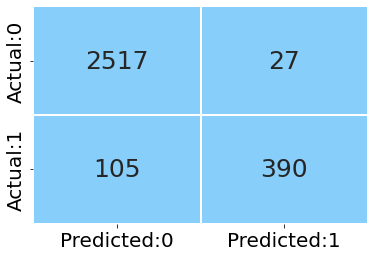

Precision =  0.6405228758169934
Recall = 0.593939393939394
Specificity = 0.9351415094339622
FPR = 0.06485849056603774
F1-Score = 0.6163522012578616
Accuracy = 0.8795656465942744
Cohen Kappa Score = 0.5450442490907217
AUC Score = 0.7645404516866781
Classification Report :
              precision    recall  f1-score   support

 not churned       0.92      0.94      0.93      2544
     churned       0.64      0.59      0.62       495

    accuracy                           0.88      3039
   macro avg       0.78      0.76      0.77      3039
weighted avg       0.88      0.88      0.88      3039



In [25]:
# Do Prediction on the Test Set
y_pred_gnb = gnb_model.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred_gnb = [ 0 if x < 0.5 else 1 for x in y_pred_gnb]

# Plot the Confusion Matrix
cnf_matrix_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)

conf_matrix = pd.DataFrame(data = cnf_matrix_rf,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_gnb[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_gnb[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_gnb[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_gnb[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa_gnb = cohen_kappa_score(y_test, y_pred_gnb)
print('Cohen Kappa Score =', kappa_gnb)

# AUC Score
auc = roc_auc_score(y_test, y_pred_gnb)
print('AUC Score =', auc)

# Classification Report
gnb_class_report = classification_report(y_test, y_pred_gnb, target_names=['not churned', 'churned'])
print('Classification Report :')
print(gnb_class_report)

In [26]:
# compile the required information
gnb_basemodel_metrics = pd.Series({
                     'Model_Name': "Gaussian Naive Bayes Base Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa_gnb,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(gnb_basemodel_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Base Model,0.911484,0.808743,0.597980,0.972484,0.637354,0.785232,0.687573
1,KNN Base Model,0.843370,0.537849,0.272727,0.954403,0.283384,0.613565,0.361930
2,Decision Tree Base Model,0.939590,0.671642,0.569620,0.974057,0.791168,0.883998,0.616438
3,Random Forest Base Model,0.956565,0.935252,0.787879,0.989387,0.829931,0.888633,0.855263
4,Gaussian Naive Bayes Base Model,0.879566,0.640523,0.593939,0.935142,0.545044,0.764540,0.616352


# 6. Support Vector Classification Base Model

In [27]:
# instantiate the 'GaussianNB'
svc = SVC()

# fit the model using fit() on train data
svc_model = svc.fit(X_train, y_train)

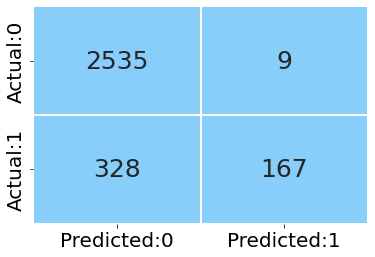

Precision =  0.9488636363636364
Recall = 0.3373737373737374
Specificity = 0.9964622641509434
FPR = 0.003537735849056604
F1-Score = 0.49776453055141584
Accuracy = 0.889108259295821
Cohen Kappa Score = 0.4508407558679177
AUC Score = 0.6669180007623404
Classification Report :
              precision    recall  f1-score   support

 not churned       0.89      1.00      0.94      2544
     churned       0.95      0.34      0.50       495

    accuracy                           0.89      3039
   macro avg       0.92      0.67      0.72      3039
weighted avg       0.90      0.89      0.87      3039



In [28]:
# Do Prediction on the Test Set
y_pred_svc = svc_model.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred_svc = [ 0 if x < 0.5 else 1 for x in y_pred_svc]

# Plot the Confusion Matrix
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)

conf_matrix = pd.DataFrame(data = cnf_matrix_svc,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_svc[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_svc[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_svc[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_svc[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa_svc = cohen_kappa_score(y_test, y_pred_svc)
print('Cohen Kappa Score =', kappa_svc)

# AUC Score
auc = roc_auc_score(y_test, y_pred_svc)
print('AUC Score =', auc)

# Classification Report
gnb_class_report = classification_report(y_test, y_pred_svc, target_names=['not churned', 'churned'])
print('Classification Report :')
print(gnb_class_report)

In [29]:
# compile the required information
svc_basemodel_metrics = pd.Series({
                     'Model_Name': "Support Vector Classifier Base Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa_svc,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(svc_basemodel_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Base Model,0.911484,0.808743,0.597980,0.972484,0.637354,0.785232,0.687573
1,KNN Base Model,0.843370,0.537849,0.272727,0.954403,0.283384,0.613565,0.361930
2,Decision Tree Base Model,0.939590,0.671642,0.569620,0.974057,0.791168,0.883998,0.616438
3,Random Forest Base Model,0.956565,0.935252,0.787879,0.989387,0.829931,0.888633,0.855263
4,Gaussian Naive Bayes Base Model,0.879566,0.640523,0.593939,0.935142,0.545044,0.764540,0.616352
5,Support Vector Classifier Base Model,0.889108,0.948864,0.337374,0.996462,0.450841,0.666918,0.497765


# 7. AdaBoost Classifier Base Model

In [30]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model = ada.fit(X_train, y_train)

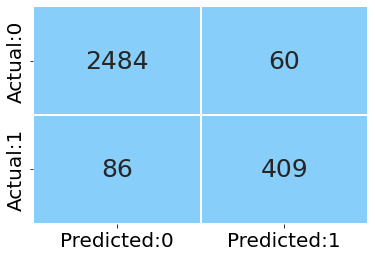

Precision =  0.8720682302771855
Recall = 0.8262626262626263
Specificity = 0.9764150943396226
FPR = 0.02358490566037736
F1-Score = 0.8485477178423235
Accuracy = 0.9519578808818691
Cohen Kappa Score = 0.820023315753223
AUC Score = 0.9013388603011244
Classification Report :
              precision    recall  f1-score   support

 not churned       0.89      1.00      0.94      2544
     churned       0.95      0.34      0.50       495

    accuracy                           0.89      3039
   macro avg       0.92      0.67      0.72      3039
weighted avg       0.90      0.89      0.87      3039



In [31]:
# Do Prediction on the Test Set
y_pred_ada = ada_model.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred_ada = [ 0 if x < 0.5 else 1 for x in y_pred_ada]

# Plot the Confusion Matrix
cnf_matrix_ada = metrics.confusion_matrix(y_test, y_pred_ada)

conf_matrix = pd.DataFrame(data = cnf_matrix_ada,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_ada[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_ada[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_ada[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_ada[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa_ada = cohen_kappa_score(y_test, y_pred_ada)
print('Cohen Kappa Score =', kappa_ada)

# AUC Score
auc = roc_auc_score(y_test, y_pred_ada)
print('AUC Score =', auc)

# Classification Report
ada_class_report = classification_report(y_test, y_pred_ada, target_names=['not churned', 'churned'])
print('Classification Report :')
print(gnb_class_report)

In [32]:
# compile the required information
ada_basemodel_metrics = pd.Series({
                     'Model_Name': "AdaBoost Classifier Base Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa_ada,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(ada_basemodel_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Base Model,0.911484,0.808743,0.597980,0.972484,0.637354,0.785232,0.687573
1,KNN Base Model,0.843370,0.537849,0.272727,0.954403,0.283384,0.613565,0.361930
2,Decision Tree Base Model,0.939590,0.671642,0.569620,0.974057,0.791168,0.883998,0.616438
3,Random Forest Base Model,0.956565,0.935252,0.787879,0.989387,0.829931,0.888633,0.855263
4,Gaussian Naive Bayes Base Model,0.879566,0.640523,0.593939,0.935142,0.545044,0.764540,0.616352
5,Support Vector Classifier Base Model,0.889108,0.948864,0.337374,0.996462,0.450841,0.666918,0.497765
6,AdaBoost Classifier Base Model,0.951958,0.872068,0.826263,0.976415,0.820023,0.901339,0.848548


# 8. Gradient Boosting Classifier Base Model

In [33]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each code implementation
gboost = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model = gboost.fit(X_train, y_train)

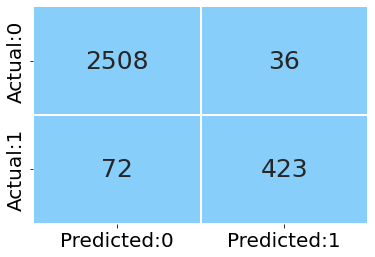

Precision =  0.9215686274509803
Recall = 0.8545454545454545
Specificity = 0.9858490566037735
FPR = 0.014150943396226415
F1-Score = 0.8867924528301887
Accuracy = 0.9644619940769991
Cohen Kappa Score = 0.8657507620267704
AUC Score = 0.9201972555746141
Classification Report :
              precision    recall  f1-score   support

 not churned       0.97      0.99      0.98      2544
     churned       0.92      0.85      0.89       495

    accuracy                           0.96      3039
   macro avg       0.95      0.92      0.93      3039
weighted avg       0.96      0.96      0.96      3039



In [34]:
# Do Prediction on the Test Set
y_pred_gboost = gboost_model.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred_gboost = [ 0 if x < 0.5 else 1 for x in y_pred_gboost]

# Plot the Confusion Matrix
cnf_matrix_gboost = metrics.confusion_matrix(y_test, y_pred_gboost)

conf_matrix = pd.DataFrame(data = cnf_matrix_gboost,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_gboost[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_gboost[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_gboost[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_gboost[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa_gboost = cohen_kappa_score(y_test, y_pred_gboost)
print('Cohen Kappa Score =', kappa_gboost)

# AUC Score
auc = roc_auc_score(y_test, y_pred_gboost)
print('AUC Score =', auc)

# Classification Report
gboost_class_report = classification_report(y_test, y_pred_gboost, target_names=['not churned', 'churned'])
print('Classification Report :')
print(gboost_class_report)

In [35]:
# compile the required information
gboost_basemodel_metrics = pd.Series({
                     'Model_Name': "Gradient Boost Classifier Base Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa_gboost,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(gboost_basemodel_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Base Model,0.911484,0.808743,0.597980,0.972484,0.637354,0.785232,0.687573
1,KNN Base Model,0.843370,0.537849,0.272727,0.954403,0.283384,0.613565,0.361930
2,Decision Tree Base Model,0.939590,0.671642,0.569620,0.974057,0.791168,0.883998,0.616438
3,Random Forest Base Model,0.956565,0.935252,0.787879,0.989387,0.829931,0.888633,0.855263
4,Gaussian Naive Bayes Base Model,0.879566,0.640523,0.593939,0.935142,0.545044,0.764540,0.616352
5,Support Vector Classifier Base Model,0.889108,0.948864,0.337374,0.996462,0.450841,0.666918,0.497765
6,AdaBoost Classifier Base Model,0.951958,0.872068,0.826263,0.976415,0.820023,0.901339,0.848548
7,Gradient Boost Classifier Base Model,0.964462,0.921569,0.854545,0.985849,0.865751,0.920197,0.886792


From the above Score Card generated for all the Base models which are tried on our dataset, we have the following observations :-

- The Top 3 Models on basis of :-
    - Accuracy - GradientBoost, AdaBoost, RandomForest
    - Precision - RandomForest, SVC, GradientBoost
    - Recall - GradientBoost, AdaBoost, RandomForest
    - Specificity - SVC, RandomForest, GradientBoost
    - Cophen Kappa Score - GradientBoost, AdaBoost, Random Forest
    - AUC Score - GradientBoost, AdaBoost, Random Forest
    - F1-Score - GradientBoost, AdaBoost, RandomForest

Our Top 3 Performing Base Models are **GradientBoost, AdaBoost and RandomForest**. Hence, we would be using these 3 Models for further Hypertuning and Feature Engineering/Selection Steps to decide our Final Model.

# STEP - 2 - HYPERPARAMETER TUNING OF THE MODELS

**Creating New Score Card to check the Performance of Tuned Models**

In [36]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card_tuned = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'Cohen-Kappa Score','AUC Score','f1-score'])

# print the score card
score_card_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score


We are using the GridSearchCV Method to tune the Models.

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. We pass some of the hyperparameters in the decision tree to the GridSearchCV() and build the tree using the optimal values obtained using GridSearch method.

# 1. Hyperparameter Tuning - Logistic Regression

In [37]:
tuned_paramaters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
logreg = LogisticRegression(random_state=10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
gs = GridSearchCV(estimator = logreg, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
logreg_tuned = gs.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Logistic Regression Model : ', logreg_tuned.best_params_, '\n')
print('Best estimators for Logistic Regression Model : ', logreg_tuned.best_estimator_, '\n')

Best parameters for Logistic Regression Model :  {'C': 100} 

Best estimators for Logistic Regression Model :  LogisticRegression(C=100, random_state=10) 



In [38]:
# Build the model using the tuned hyperparameters.
logreg = LogisticRegression(random_state=10, C=1000)

# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg_tuned = logreg.fit(X_train, y_train)

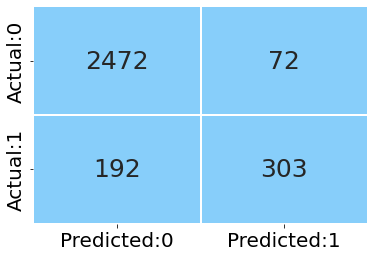

Precision =  0.808
Recall = 0.6121212121212121
Specificity = 0.9716981132075472
FPR = 0.02830188679245283
F1-Score = 0.696551724137931
Accuracy = 0.9131293188548865
Cohen Kappa Score = 0.6469824172342785
AUC Score = 0.7919096626643797
Classification Report :
              precision    recall  f1-score   support

 not churned       0.93      0.97      0.95      2544
     churned       0.81      0.61      0.70       495

    accuracy                           0.91      3039
   macro avg       0.87      0.79      0.82      3039
weighted avg       0.91      0.91      0.91      3039



In [39]:
# Do Prediction on the Test Set
y_pred = logreg_tuned.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_lr = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_lr[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_lr[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_lr[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_lr[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

In [40]:
# compile the required information
lr_tunedmodel_metrics = pd.Series({
                     'Model_Name': "Logistic Regression Tuned Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card_tuned = score_card_tuned.append(lr_tunedmodel_metrics, ignore_index=True)

# print the result table
score_card_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Tuned Model,0.913129,0.808000,0.612121,0.971698,0.646982,0.791910,0.696552


# 2. Hyperparameter Tuning - KNN

In [41]:
tuned_paramaters = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev', 'euclidean')}
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
knn = KNeighborsClassifier(algorithm='auto')

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
gs = GridSearchCV(estimator = knn,  
                           param_grid = tuned_paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

# fit the model on X_train and y_train using fit()
knn_tuned = gs.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Model : ', knn_tuned.best_params_, '\n')
print('Best estimators for KNN Model : ', knn_tuned.best_estimator_, '\n')

Best parameters for KNN Model :  {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'} 

Best estimators for KNN Model :  KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1, weights='distance') 



In [42]:
# Build the model using the tuned hyperparameters.
knn = KNeighborsClassifier(n_neighbors = 10, leaf_size=20, metric='minkowski', p=1, weights='distance')

# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
knn_tuned = knn.fit(X_train, y_train)

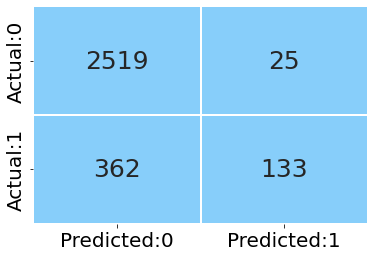

Precision =  0.8417721518987342
Recall = 0.2686868686868687
Specificity = 0.9901729559748428
FPR = 0.009827044025157232
F1-Score = 0.4073506891271057
Accuracy = 0.8726554787759131
Cohen Kappa Score = 0.35663962688049045
AUC Score = 0.6294299123308558
Classification Report :
              precision    recall  f1-score   support

 not churned       0.87      0.99      0.93      2544
     churned       0.84      0.27      0.41       495

    accuracy                           0.87      3039
   macro avg       0.86      0.63      0.67      3039
weighted avg       0.87      0.87      0.84      3039



In [43]:
# Do Prediction on the Test Set
y_pred = knn_tuned.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_knn = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_knn[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_knn[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_knn[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_knn[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

In [44]:
# compile the required information
knn_tunedmodel_metrics = pd.Series({
                     'Model_Name': "KNN Tuned Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card_tuned = score_card_tuned.append(knn_tunedmodel_metrics, ignore_index=True)

# print the result table
score_card_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Tuned Model,0.913129,0.808000,0.612121,0.971698,0.646982,0.791910,0.696552
1,KNN Tuned Model,0.872655,0.841772,0.268687,0.990173,0.356640,0.629430,0.407351


# 3. Hyperparameter Tuning - Decision Tree

In [45]:
tuned_paramaters = [{'criterion': ['entropy'], 
                     'max_depth': [5,10],  # 5,6,7,
                     'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'min_samples_split': [2,5,8], # 1-3% of the total records
                     'min_samples_leaf': [1,5,9], # 1-3% of the min_sample_split
                     'max_leaf_nodes': [5,8]}]
 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Decision Tree Model : ', tree_grid_model.best_params_, '\n')
print('Best estimators for Decision Tree Model : ', tree_grid_model.best_estimator_, '\n')

Best parameters for Decision Tree Model :  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2} 

Best estimators for Decision Tree Model :  DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=8, random_state=10) 



In [46]:
# Build the model using the tuned hyperparameters.
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=5,
                                  max_features='sqrt',
                                  max_leaf_nodes=8,
                                  min_samples_leaf=1, 
                                  min_samples_split=2,
                                  random_state = 10)

# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
dt_tuned = dt_model.fit(X_train, y_train)

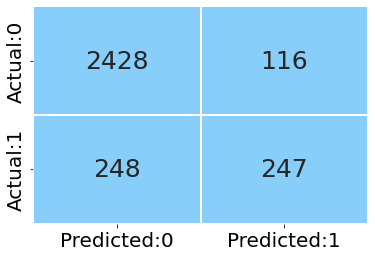

Precision =  0.6804407713498623
Recall = 0.498989898989899
Specificity = 0.9544025157232704
FPR = 0.04559748427672956
F1-Score = 0.5757575757575758
Accuracy = 0.8802237578150708
Cohen Kappa Score = 0.5079400665097336
AUC Score = 0.7266962073565847
Classification Report :
              precision    recall  f1-score   support

 not churned       0.91      0.95      0.93      2544
     churned       0.68      0.50      0.58       495

    accuracy                           0.88      3039
   macro avg       0.79      0.73      0.75      3039
weighted avg       0.87      0.88      0.87      3039



In [47]:
# Do Prediction on the Test Set
y_pred = dt_tuned.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_dt = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_dt,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_dt[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_dt[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_dt[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_dt[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

In [48]:
# compile the required information
dt_tunedmodel_metrics = pd.Series({
                     'Model_Name': "Decision Tree Tuned Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card_tuned = score_card_tuned.append(dt_tunedmodel_metrics, ignore_index=True)

# print the result table
score_card_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Tuned Model,0.913129,0.808000,0.612121,0.971698,0.646982,0.791910,0.696552
1,KNN Tuned Model,0.872655,0.841772,0.268687,0.990173,0.356640,0.629430,0.407351
2,Decision Tree Tuned Model,0.880224,0.680441,0.498990,0.954403,0.507940,0.726696,0.575758


# 4. Hyperparameter Tuning - Random Forest

*Using RandomizedSearcgCV with Random Forest Model*

In [49]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
rf_grid = RandomizedSearchCV(estimator = random_forest_classification, 
                       param_distributions = tuned_paramaters, 
                       cv = 10,verbose=2, n_jobs = 4)

# fit the model on X_train and y_train using fit()
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Random Forest Model : ', rf_grid_model.best_params_, '\n')
print('Best estimators for Random Forest Model : ', rf_grid_model.best_estimator_, '\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters for Random Forest Model :  {'n_estimators': 90, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_leaf_nodes': 11, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'} 

Best estimators for Random Forest Model :  RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=11, min_samples_split=11, n_estimators=90,
                       random_state=10) 



In [50]:
# Build the model using the tuned hyperparameters.
rf_model = RandomForestClassifier(criterion='gini',
                                  max_depth=10,
                                  max_features='sqrt',
                                  max_leaf_nodes=11,
                                  min_samples_leaf=5, 
                                  min_samples_split=8,
                                  random_state = 10)

# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
rf_tuned = rf_model.fit(X_train, y_train)

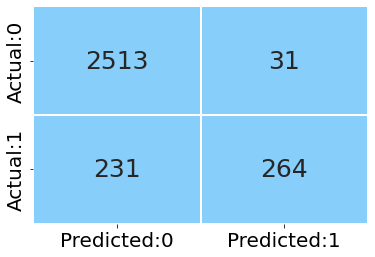

Precision =  0.8949152542372881
Recall = 0.5333333333333333
Specificity = 0.987814465408805
FPR = 0.01218553459119497
F1-Score = 0.6683544303797468
Accuracy = 0.9137874300756827
Cohen Kappa Score = 0.6224236043931031
AUC Score = 0.7605738993710691
Classification Report :
              precision    recall  f1-score   support

 not churned       0.92      0.99      0.95      2544
     churned       0.89      0.53      0.67       495

    accuracy                           0.91      3039
   macro avg       0.91      0.76      0.81      3039
weighted avg       0.91      0.91      0.90      3039



In [51]:
# Do Prediction on the Test Set
y_pred = rf_tuned.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_rf,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_rf[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_rf[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_rf[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_rf[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

In [52]:
# compile the required information
rf_tunedmodel_metrics = pd.Series({
                     'Model_Name': "Random Forest Tuned Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card_tuned = score_card_tuned.append(rf_tunedmodel_metrics, ignore_index=True)

# print the result table
score_card_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Tuned Model,0.913129,0.808000,0.612121,0.971698,0.646982,0.791910,0.696552
1,KNN Tuned Model,0.872655,0.841772,0.268687,0.990173,0.356640,0.629430,0.407351
2,Decision Tree Tuned Model,0.880224,0.680441,0.498990,0.954403,0.507940,0.726696,0.575758
3,Random Forest Tuned Model,0.913787,0.894915,0.533333,0.987814,0.622424,0.760574,0.668354


# 5. Hyperparameter Tuning - Gaussian Naive Bayes Model

In [53]:
tuned_paramaters = {'var_smoothing': [1e-11, 1e-10, 1e-9]}
 
# pass the 'random_state' to obtain the same samples for each time you run the code
gnb = GaussianNB()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
gnb_grid = GridSearchCV(estimator = gnb, 
                       param_grid = tuned_paramaters, 
                       scoring='accuracy', 
                       cv=10)

# fit the model on X_train and y_train using fit()
gnb_grid_model = gnb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Gaussian Naive Bayes Model : ', gnb_grid_model.best_params_, '\n')
print('Best estimators for Gaussian Naive Bayes Model : ', gnb_grid_model.best_estimator_, '\n')

Best parameters for Gaussian Naive Bayes Model :  {'var_smoothing': 1e-11} 

Best estimators for Gaussian Naive Bayes Model :  GaussianNB(var_smoothing=1e-11) 



In [54]:
# Build the model using the tuned hyperparameters.
gnb_model = GaussianNB(var_smoothing = 1e-11)

# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
gnb_tuned = gnb_model.fit(X_train, y_train)

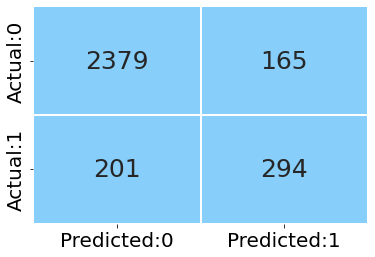

Precision =  0.6405228758169934
Recall = 0.593939393939394
Specificity = 0.9351415094339622
FPR = 0.06485849056603774
F1-Score = 0.6163522012578616
Accuracy = 0.8795656465942744
Cohen Kappa Score = 0.5450442490907217
AUC Score = 0.7645404516866781
Classification Report :
              precision    recall  f1-score   support

 not churned       0.92      0.94      0.93      2544
     churned       0.64      0.59      0.62       495

    accuracy                           0.88      3039
   macro avg       0.78      0.76      0.77      3039
weighted avg       0.88      0.88      0.88      3039



In [55]:
# Do Prediction on the Test Set
y_pred = gnb_tuned.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_gnb = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_gnb,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_gnb[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_gnb[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_gnb[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_gnb[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

In [56]:
# compile the required information
gnb_tunedmodel_metrics = pd.Series({
                     'Model_Name': "Gaussian Naive Bayes Tuned Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card_tuned = score_card_tuned.append(gnb_tunedmodel_metrics, ignore_index=True)

# print the result table
score_card_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Tuned Model,0.913129,0.808000,0.612121,0.971698,0.646982,0.791910,0.696552
1,KNN Tuned Model,0.872655,0.841772,0.268687,0.990173,0.356640,0.629430,0.407351
2,Decision Tree Tuned Model,0.880224,0.680441,0.498990,0.954403,0.507940,0.726696,0.575758
3,Random Forest Tuned Model,0.913787,0.894915,0.533333,0.987814,0.622424,0.760574,0.668354
4,Gaussian Naive Bayes Tuned Model,0.879566,0.640523,0.593939,0.935142,0.545044,0.764540,0.616352


# 6. Hyperparameter Tuning - SVC

In [57]:
tuned_paramaters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
# pass the 'random_state' to obtain the same samples for each time you run the code
svc = SVC()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
svc_grid = GridSearchCV(estimator = svc, 
                       param_grid = tuned_paramaters,  
                        verbose = 3)

# fit the model on X_train and y_train using fit()
svc_grid_model = svc_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for SVC Model : ', svc_grid_model.best_params_, '\n')
print('Best estimators for SVC Model : ', svc_grid_model.best_estimator_, '\n')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.841 total time=   1.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   1.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   1.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.841 total time=   1.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.841 total time=   1.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.841 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.841 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.841 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.841 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [58]:
# Build the model using the tuned hyperparameters.
svc_model = SVC(C=1000, gamma=0.01, kernel='rbf')

# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
svc_tuned = svc_model.fit(X_train, y_train)

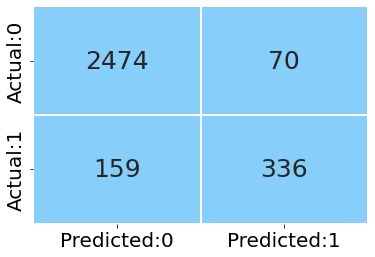

Precision =  0.8275862068965517
Recall = 0.6787878787878788
Specificity = 0.9724842767295597
FPR = 0.027515723270440252
F1-Score = 0.7458379578246394
Accuracy = 0.924646265218822
Cohen Kappa Score = 0.7021097089759905
AUC Score = 0.8256360777587193
Classification Report :
              precision    recall  f1-score   support

 not churned       0.94      0.97      0.96      2544
     churned       0.83      0.68      0.75       495

    accuracy                           0.92      3039
   macro avg       0.88      0.83      0.85      3039
weighted avg       0.92      0.92      0.92      3039



In [59]:
# Do Prediction on the Test Set
y_pred = svc_tuned.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_svc,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_svc[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_svc[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_svc[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_svc[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

In [60]:
# compile the required information
svc_tunedmodel_metrics = pd.Series({
                     'Model_Name': "SVC Tuned Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card_tuned = score_card_tuned.append(svc_tunedmodel_metrics, ignore_index=True)

# print the result table
score_card_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Tuned Model,0.913129,0.808000,0.612121,0.971698,0.646982,0.791910,0.696552
1,KNN Tuned Model,0.872655,0.841772,0.268687,0.990173,0.356640,0.629430,0.407351
2,Decision Tree Tuned Model,0.880224,0.680441,0.498990,0.954403,0.507940,0.726696,0.575758
3,Random Forest Tuned Model,0.913787,0.894915,0.533333,0.987814,0.622424,0.760574,0.668354
4,Gaussian Naive Bayes Tuned Model,0.879566,0.640523,0.593939,0.935142,0.545044,0.764540,0.616352
5,SVC Tuned Model,0.924646,0.827586,0.678788,0.972484,0.702110,0.825636,0.745838


# 7. Hyperparameter Tuning - AdaBoost

In [61]:
tuned_paramaters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30]}
 
# pass the 'random_state' to obtain the same samples for each time you run the code
ada = AdaBoostClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
ada_grid = GridSearchCV(estimator = ada, param_grid = tuned_paramaters,cv=10)

# fit the model on X_train and y_train using fit()
ada_grid_model = ada_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for AdaBoost Model : ', ada_grid_model.best_params_, '\n')
print('Best estimators for AdaBoost Model : ', ada_grid_model.best_estimator_, '\n')

Best parameters for AdaBoost Model :  {'learning_rate': 0.6, 'n_estimators': 30} 

Best estimators for AdaBoost Model :  AdaBoostClassifier(learning_rate=0.6, n_estimators=30) 



In [62]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada = AdaBoostClassifier(learning_rate=0.6, n_estimators=30, random_state = 10)

# fit the model using fit() on train data
ada_tuned = ada.fit(X_train, y_train)

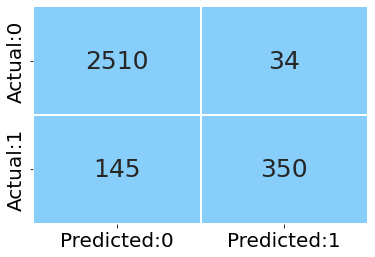

Precision =  0.9114583333333334
Recall = 0.7070707070707071
Specificity = 0.9866352201257862
FPR = 0.013364779874213837
F1-Score = 0.7963594994311718
Accuracy = 0.9410990457387298
Cohen Kappa Score = 0.7625699384711676
AUC Score = 0.8468529635982467
Classification Report :
              precision    recall  f1-score   support

 not churned       0.95      0.99      0.97      2544
     churned       0.91      0.71      0.80       495

    accuracy                           0.94      3039
   macro avg       0.93      0.85      0.88      3039
weighted avg       0.94      0.94      0.94      3039



In [63]:
# Do Prediction on the Test Set
y_pred = ada_tuned.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_ada = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_ada,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_ada[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_ada[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_ada[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_ada[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

In [64]:
# compile the required information
ada_tunedmodel_metrics = pd.Series({
                     'Model_Name': "AdaBoost Tuned Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card_tuned = score_card_tuned.append(ada_tunedmodel_metrics, ignore_index=True)

# print the result table
score_card_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Tuned Model,0.913129,0.808000,0.612121,0.971698,0.646982,0.791910,0.696552
1,KNN Tuned Model,0.872655,0.841772,0.268687,0.990173,0.356640,0.629430,0.407351
2,Decision Tree Tuned Model,0.880224,0.680441,0.498990,0.954403,0.507940,0.726696,0.575758
3,Random Forest Tuned Model,0.913787,0.894915,0.533333,0.987814,0.622424,0.760574,0.668354
4,Gaussian Naive Bayes Tuned Model,0.879566,0.640523,0.593939,0.935142,0.545044,0.764540,0.616352
5,SVC Tuned Model,0.924646,0.827586,0.678788,0.972484,0.702110,0.825636,0.745838
6,AdaBoost Tuned Model,0.941099,0.911458,0.707071,0.986635,0.762570,0.846853,0.796359


# 8. Hyperparameter Tuning - Gradient Boost

In [65]:
tuned_paramaters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30]}

# pass the 'random_state' to obtain the same samples for each time you run the code
gb = GradientBoostingClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
gb_grid = GridSearchCV(estimator = gb, param_grid = tuned_paramaters, cv=10)

# fit the model on X_train and y_train using fit()
gb_grid_model = gb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for AdaBoost Model : ', gb_grid_model.best_params_, '\n')
print('Best estimators for AdaBoost Model : ', gb_grid_model.best_estimator_, '\n')

Best parameters for AdaBoost Model :  {'learning_rate': 0.5, 'n_estimators': 30} 

Best estimators for AdaBoost Model :  GradientBoostingClassifier(learning_rate=0.5, n_estimators=30) 



In [66]:
# instantiate the 'GradientBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
gb = GradientBoostingClassifier(learning_rate=0.4, n_estimators=30, random_state = 10)

# fit the model using fit() on train data
gb_tuned = gb.fit(X_train, y_train)

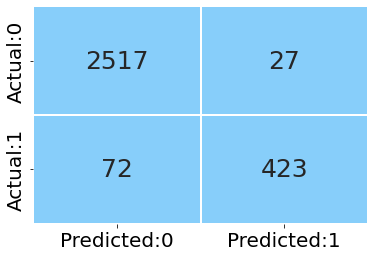

Precision =  0.94
Recall = 0.8545454545454545
Specificity = 0.9893867924528302
FPR = 0.01061320754716981
F1-Score = 0.8952380952380952
Accuracy = 0.9674234945705824
Cohen Kappa Score = 0.876002893228732
AUC Score = 0.9219661234991423
Classification Report :
              precision    recall  f1-score   support

 not churned       0.97      0.99      0.98      2544
     churned       0.94      0.85      0.90       495

    accuracy                           0.97      3039
   macro avg       0.96      0.92      0.94      3039
weighted avg       0.97      0.97      0.97      3039



In [67]:
# Do Prediction on the Test Set
y_pred = gb_tuned.predict(X_test)

# Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. 
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_gb = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_gb,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_gb[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_gb[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_gb[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_gb[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

In [68]:
# compile the required information
gb_tunedmodel_metrics = pd.Series({
                     'Model_Name': "Gradient Boost Tuned Model",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card_tuned = score_card_tuned.append(gb_tunedmodel_metrics, ignore_index=True)

# print the result table
score_card_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Tuned Model,0.913129,0.808000,0.612121,0.971698,0.646982,0.791910,0.696552
1,KNN Tuned Model,0.872655,0.841772,0.268687,0.990173,0.356640,0.629430,0.407351
2,Decision Tree Tuned Model,0.880224,0.680441,0.498990,0.954403,0.507940,0.726696,0.575758
3,Random Forest Tuned Model,0.913787,0.894915,0.533333,0.987814,0.622424,0.760574,0.668354
4,Gaussian Naive Bayes Tuned Model,0.879566,0.640523,0.593939,0.935142,0.545044,0.764540,0.616352
5,SVC Tuned Model,0.924646,0.827586,0.678788,0.972484,0.702110,0.825636,0.745838
6,AdaBoost Tuned Model,0.941099,0.911458,0.707071,0.986635,0.762570,0.846853,0.796359
7,Gradient Boost Tuned Model,0.967423,0.940000,0.854545,0.989387,0.876003,0.921966,0.895238


## Compare Performance of Base Models and Tuned Models

**Base Models**

In [69]:
score_card

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Base Model,0.911484,0.808743,0.597980,0.972484,0.637354,0.785232,0.687573
1,KNN Base Model,0.843370,0.537849,0.272727,0.954403,0.283384,0.613565,0.361930
2,Decision Tree Base Model,0.939590,0.671642,0.569620,0.974057,0.791168,0.883998,0.616438
3,Random Forest Base Model,0.956565,0.935252,0.787879,0.989387,0.829931,0.888633,0.855263
4,Gaussian Naive Bayes Base Model,0.879566,0.640523,0.593939,0.935142,0.545044,0.764540,0.616352
5,Support Vector Classifier Base Model,0.889108,0.948864,0.337374,0.996462,0.450841,0.666918,0.497765
6,AdaBoost Classifier Base Model,0.951958,0.872068,0.826263,0.976415,0.820023,0.901339,0.848548
7,Gradient Boost Classifier Base Model,0.964462,0.921569,0.854545,0.985849,0.865751,0.920197,0.886792


**Tuned Models**

In [70]:
score_card_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Logistic Regression Tuned Model,0.913129,0.808000,0.612121,0.971698,0.646982,0.791910,0.696552
1,KNN Tuned Model,0.872655,0.841772,0.268687,0.990173,0.356640,0.629430,0.407351
2,Decision Tree Tuned Model,0.880224,0.680441,0.498990,0.954403,0.507940,0.726696,0.575758
3,Random Forest Tuned Model,0.913787,0.894915,0.533333,0.987814,0.622424,0.760574,0.668354
4,Gaussian Naive Bayes Tuned Model,0.879566,0.640523,0.593939,0.935142,0.545044,0.764540,0.616352
5,SVC Tuned Model,0.924646,0.827586,0.678788,0.972484,0.702110,0.825636,0.745838
6,AdaBoost Tuned Model,0.941099,0.911458,0.707071,0.986635,0.762570,0.846853,0.796359
7,Gradient Boost Tuned Model,0.967423,0.940000,0.854545,0.989387,0.876003,0.921966,0.895238


From the above Score Card generated for all the Tuned models which are tried on our dataset, we have the following observations :-

The Model Perfomances which have improved after Hyperparameter Tuning are - **Gradient Boost, AdaBoost and SVC.**

# STEP - 3 - FEATURE ENGINEERING AND SELECTION

Feature engineering is a machine learning technique that leverages data to create new variables that aren't in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

**Creating New Score Card to check the Performance of Tuned Models with Significant Features**

In [71]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card_sig_tuned = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'Cohen-Kappa Score','AUC Score','f1-score'])

# print the score card
score_card_sig_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score


# 1. SIGNIFICANT FEATURES - GRADIENT BOOST MODEL

In [72]:
# Feature Importance according to Gradient Boost Classifier Model :
feature_importance_gboost = pd.DataFrame({"Feature": X_train.columns,"Importance":gb_tuned.feature_importances_})

# Sort the importance of the features in the descending order of importance
# (i.e the topmost feature being the most important feature):
feature_importance_gboost.sort_values(by = "Importance",ascending = False, inplace = True)

# Print the importance of all the features in the descending order:
feature_importance_gboost.reset_index()

,index,Feature,Importance
0,16,Total_Trans_Ct,0.355028
1,12,Total_Revolving_Bal,0.201131
2,15,Total_Trans_Amt,0.184269
3,17,Total_Ct_Chng_Q4_Q1,0.080023
4,8,Total_Relationship_Count,0.068889
5,14,Total_Amt_Chng_Q4_Q1,0.050446
6,9,Months_Inactive_12_mon,0.017820
7,0,Customer_Age,0.016122
8,10,Contacts_Count_12_mon,0.013574
9,18,Avg_Utilization_Ratio,0.004018


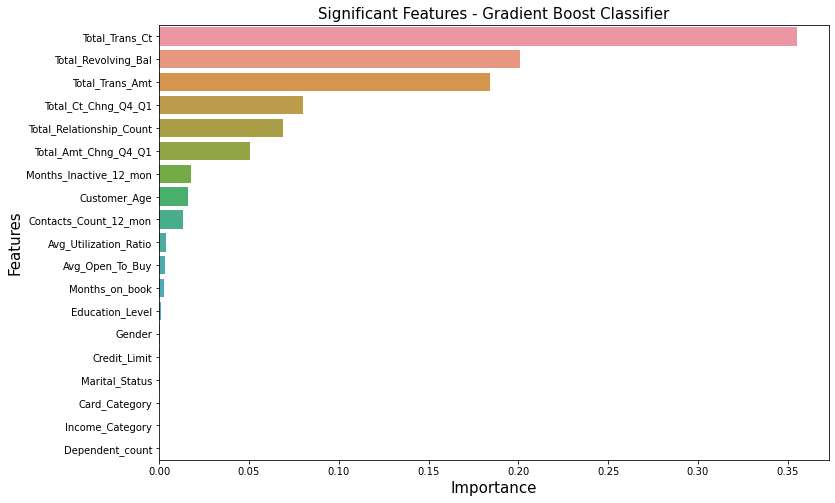

In [73]:
# Create a Bar plot to visualize the features based on importance and set the plot size using 'figsize':

plt.figure(figsize=(12,8))
sns.barplot(x = 'Importance',y='Feature',data = feature_importance_gboost)

# Add plot and axes labels and set the text size using 'fontsize': 
plt.title('Significant Features - Gradient Boost Classifier',fontsize = 15)
plt.xlabel('Importance',fontsize= 15)
plt.ylabel('Features',fontsize= 15)

# Display the plot:
plt.show()

**Retrieve Top 10 Significant Features for the Model and tune a new model with only the Significant Features**

In [74]:
#get the top 10 important columns from the dataframe 'feature_importance_rf_tuned' by using iloc
significant_feat_gb = list(feature_importance_gboost['Feature'].iloc[0:10])

#instatiate the 'RandomForestClassifier'
gb_model = GradientBoostingClassifier(learning_rate=0.4, n_estimators=30, random_state = 10)
gb_sig_tuned = gb_model.fit(X_train[significant_feat_gb], y_train)

#predict the attrition for test set
y_pred = gb_sig_tuned.predict(X_test[significant_feat_gb])

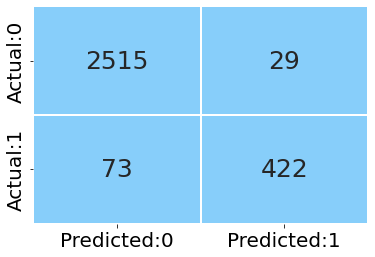

Precision =  0.9356984478935698
Recall = 0.8525252525252526
Specificity = 0.9886006289308176
FPR = 0.01139937106918239
F1-Score = 0.8921775898520085
Accuracy = 0.9664363277393879
Cohen Kappa Score = 0.8723531998794269
AUC Score = 0.920562940728035
Classification Report :
              precision    recall  f1-score   support

 not churned       0.97      0.99      0.98      2544
     churned       0.94      0.85      0.89       495

    accuracy                           0.97      3039
   macro avg       0.95      0.92      0.94      3039
weighted avg       0.97      0.97      0.97      3039



In [75]:
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_gb = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_gb,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_gb[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_gb[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_gb[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_gb[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

In [76]:
# compile the required information
gb_sig_model_metrics = pd.Series({
                     'Model_Name': "Gradient Boost Tuned Model With Significant Features",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card_sig_tuned = score_card_sig_tuned.append(gb_sig_model_metrics, ignore_index=True)

# print the result table
score_card_sig_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Gradient Boost Tuned Model With Significant Fe...,0.966436,0.935698,0.852525,0.988601,0.872353,0.920563,0.892178


# 2. SIGNIFICANT FEATURES - ADA BOOST MODEL

In [77]:
# Feature Importance according to Gradient Boost Classifier Model :
feature_importance_ada = pd.DataFrame({"Feature": X_train.columns,"Importance":ada_tuned.feature_importances_})

# Sort the importance of the features in the descending order of importance
# (i.e the topmost feature being the most important feature):
feature_importance_ada.sort_values(by = "Importance",ascending = False, inplace = True)

# Print the importance of all the features in the descending order:
feature_importance_ada.reset_index()

,index,Feature,Importance
0,15,Total_Trans_Amt,0.333333
1,16,Total_Trans_Ct,0.266667
2,12,Total_Revolving_Bal,0.133333
3,17,Total_Ct_Chng_Q4_Q1,0.066667
4,14,Total_Amt_Chng_Q4_Q1,0.066667
5,8,Total_Relationship_Count,0.066667
6,9,Months_Inactive_12_mon,0.033333
7,10,Contacts_Count_12_mon,0.033333
8,13,Avg_Open_To_Buy,0.000000
9,11,Credit_Limit,0.000000


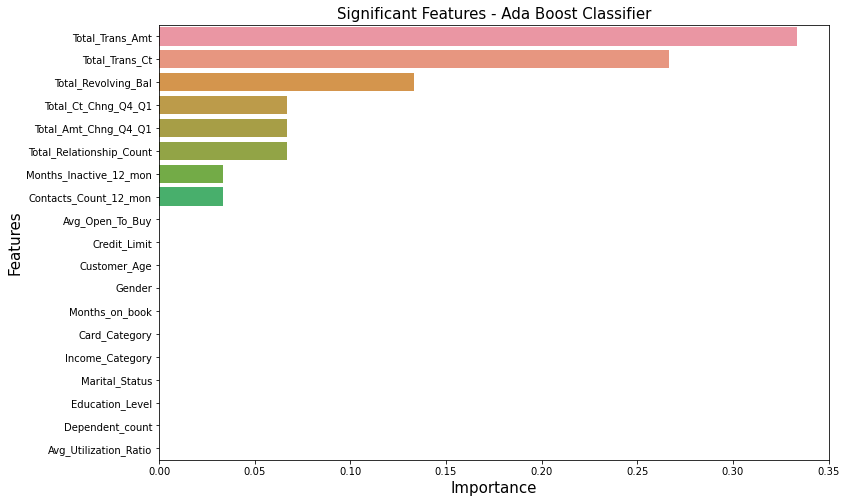

In [78]:
# Create a Bar plot to visualize the features based on importance and set the plot size using 'figsize':

plt.figure(figsize=(12,8))
sns.barplot(x = 'Importance',y='Feature',data = feature_importance_ada)

# Add plot and axes labels and set the text size using 'fontsize': 
plt.title('Significant Features - Ada Boost Classifier',fontsize = 15)
plt.xlabel('Importance',fontsize= 15)
plt.ylabel('Features',fontsize= 15)

# Display the plot:
plt.show()

**Retrieve Top 10 Significant Features for the Model and tune a new model with only the Significant Features**

In [79]:
#get the top 10 important columns from the dataframe 'feature_importance_rf_tuned' by using iloc
significant_feat_ada = list(feature_importance_ada['Feature'].iloc[0:10])

#instatiate the 'RandomForestClassifier'
ada_model = AdaBoostClassifier(learning_rate=0.6, n_estimators=30, random_state = 10)
ada_sig_tuned = ada_model.fit(X_train[significant_feat_ada], y_train)

#predict the attrition for test set
y_pred = ada_sig_tuned.predict(X_test[significant_feat_ada])

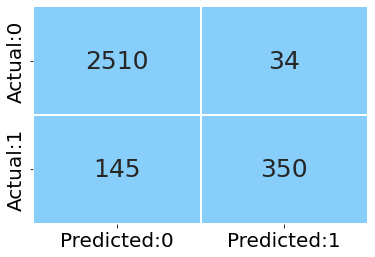

Precision =  0.9114583333333334
Recall = 0.7070707070707071
Specificity = 0.9866352201257862
FPR = 0.013364779874213837
F1-Score = 0.7963594994311718
Accuracy = 0.9410990457387298
Cohen Kappa Score = 0.7625699384711676
AUC Score = 0.8468529635982467
Classification Report :
              precision    recall  f1-score   support

 not churned       0.95      0.99      0.97      2544
     churned       0.91      0.71      0.80       495

    accuracy                           0.94      3039
   macro avg       0.93      0.85      0.88      3039
weighted avg       0.94      0.94      0.94      3039



In [80]:
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_ada = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_ada,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_ada[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_ada[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_ada[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_ada[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

In [81]:
# compile the required information
ada_sig_model_metrics = pd.Series({
                     'Model_Name': "Ada Boost Tuned Model With Significant Features",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card_sig_tuned = score_card_sig_tuned.append(ada_sig_model_metrics, ignore_index=True)

# print the result table
score_card_sig_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Gradient Boost Tuned Model With Significant Fe...,0.966436,0.935698,0.852525,0.988601,0.872353,0.920563,0.892178
1,Ada Boost Tuned Model With Significant Features,0.941099,0.911458,0.707071,0.986635,0.762570,0.846853,0.796359


# 3. SIGNIFICANT FEATURES - SVC MODEL

**Using Recursive Feature Elimination (RFE) to retrieve significant features**

In [82]:
X_train_df = pd.DataFrame(X_train,columns=X_train.columns)
svc_lin = SVC(kernel='linear')
svm_rfe_model = RFE(estimator=svc_lin)
svm_rfe_model_fit = svm_rfe_model.fit(X_train_df, y_train)
feat_index = pd.Series(data = svm_rfe_model_fit.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print('Significant features from RFE', signi_feat_rfe)

Significant features from RFE Index(['Total_Relationship_Count', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [83]:
#get the top 10 important columns from the dataframe 'feature_importance_rf_tuned' by using iloc
significant_feat_svc = signi_feat_rfe

#instatiate the 'SVC Model'
svc_model = SVC(C=1000, gamma=0.01, kernel='rbf')
svc_sig_tuned = svc_model.fit(X_train[significant_feat_svc], y_train)

#predict the attrition for test set
y_pred = svc_sig_tuned.predict(X_test[significant_feat_svc])

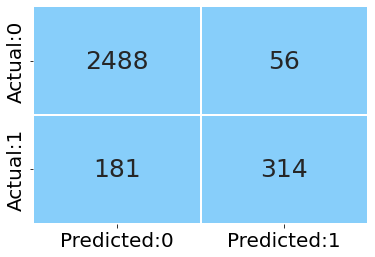

Precision =  0.8486486486486486
Recall = 0.6343434343434343
Specificity = 0.9779874213836478
FPR = 0.0220125786163522
F1-Score = 0.7260115606936416
Accuracy = 0.9220138203356367
Cohen Kappa Score = 0.6816514065597465
AUC Score = 0.8061654278635411
Classification Report :
              precision    recall  f1-score   support

 not churned       0.93      0.98      0.95      2544
     churned       0.85      0.63      0.73       495

    accuracy                           0.92      3039
   macro avg       0.89      0.81      0.84      3039
weighted avg       0.92      0.92      0.92      3039



In [84]:
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_svc,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_svc[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_svc[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_svc[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_svc[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

In [85]:
# compile the required information
svc_sig_model_metrics = pd.Series({
                     'Model_Name': "SVC Tuned Model With Significant Features",
                     'Accuracy':accuracy,
                     'Precision':precision,
                     'Recall': recall,
                     'Specificity':specificity,
                     'Cohen-Kappa Score':kappa,
                     'AUC Score':auc,
                     'f1-score':f1_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card_sig_tuned = score_card_sig_tuned.append(svc_sig_model_metrics, ignore_index=True)

# print the result table
score_card_sig_tuned

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
0,Gradient Boost Tuned Model With Significant Fe...,0.966436,0.935698,0.852525,0.988601,0.872353,0.920563,0.892178
1,Ada Boost Tuned Model With Significant Features,0.941099,0.911458,0.707071,0.986635,0.762570,0.846853,0.796359
2,SVC Tuned Model With Significant Features,0.922014,0.848649,0.634343,0.977987,0.681651,0.806165,0.726012


In [86]:
# Setting the Model Name Column as an Index Column
score_card_sig_tuned = score_card_sig_tuned.set_index('Model_Name')

**Compare the Model Performance between the Hyperparameter Tuned Models and the Final Models after being created only with Significant Features**

In [87]:
score_card_tuned.iloc[-3:]

,Model_Name,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
5,SVC Tuned Model,0.924646,0.827586,0.678788,0.972484,0.702110,0.825636,0.745838
6,AdaBoost Tuned Model,0.941099,0.911458,0.707071,0.986635,0.762570,0.846853,0.796359
7,Gradient Boost Tuned Model,0.967423,0.940000,0.854545,0.989387,0.876003,0.921966,0.895238


**Check the Best Performance Model after Significant Features are tuned**

In [88]:
score_card_sig_tuned.style.highlight_max(color = 'lightblue', axis = 0)

,Accuracy,Precision,Recall,Specificity,Cohen-Kappa Score,AUC Score,f1-score
Model_Name,,,,,,,
Gradient Boost Tuned Model With Significant Features,0.966436,0.935698,0.852525,0.988601,0.872353,0.920563,0.892178
Ada Boost Tuned Model With Significant Features,0.941099,0.911458,0.707071,0.986635,0.762570,0.846853,0.796359
SVC Tuned Model With Significant Features,0.922014,0.848649,0.634343,0.977987,0.681651,0.806165,0.726012


From the above Score Card, we can clearly observed that the Model Performance of the Gradient Boost Tuned Model with Significant Features is performing better than the other models.

Hence, we would be selecting this model as our Final Model.

# FINAL MODEL

- After performing the processing and cleaning steps on the dataset, we built 8 Classification Base Models and we performed Hyperparameter Tuning on all the Models and found 3 models to be outperforming the other models, which are - Gradient Boost, Ada Boost and Support Vector Classifier. 


- Then we performed Feature Engineering on the top 3 models to retrieve the most significant features which contribute in the Model Performance. We have created new models with only the Significant features to test whether the removal of insignificant features contribute in the better performance of the model. After tuning the models only with Significant features, we observe a growth in the Model Performances in all the 3 models.


- Out of the 3 models, the Gradient Boost Model is performing the best in terms of all Performance Metrices as can be observed in the Score Card displayed in the previous section. Hence, we would be choosing this model as the Final Model.

In [89]:
#instatiate the 'RandomForestClassifier'
gb_model = GradientBoostingClassifier(learning_rate=0.4, n_estimators=30, random_state = 10)
gb_final_model = gb_model.fit(X_train[significant_feat_gb], y_train)

#predict the attrition for test set
y_pred = gb_final_model.predict(X_test[significant_feat_gb])

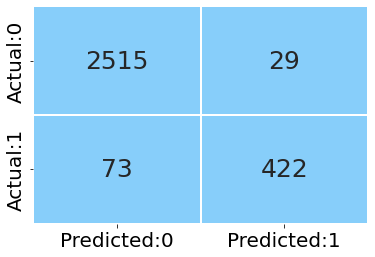

Precision =  0.9356984478935698
Recall = 0.8525252525252526
Specificity = 0.9886006289308176
FPR = 0.01139937106918239
F1-Score = 0.8921775898520085
Accuracy = 0.9664363277393879
Cohen Kappa Score = 0.8723531998794269
AUC Score = 0.920562940728035 

Classification Report :
              precision    recall  f1-score   support

 not churned       0.97      0.99      0.98      2544
     churned       0.94      0.85      0.89       495

    accuracy                           0.97      3039
   macro avg       0.95      0.92      0.94      3039
weighted avg       0.97      0.97      0.97      3039



In [90]:
# if 'y_pred' is less than 0.5, then consider it to be 0 else consider it to be 1.
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

# Plot the Confusion Matrix
cnf_matrix_gb = metrics.confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cnf_matrix_gb,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Assign the values derived from Confusion Matrix to their respective variables
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cnf_matrix_gb[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cnf_matrix_gb[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cnf_matrix_gb[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' which are classified wrongly as '0'
FN = cnf_matrix_gb[1,0]

# Compute the Performance Metric Measures

# **Precision:** It is defined as the ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
print('Precision = ', precision)

# Recall: It is the ratio of true positives to the total actual positive observations. 
# It is also known as, Sensitivity or True Positive Rate.
recall = TP / (TP+FN)
print('Recall =', recall)

# Specificity: It is the ratio of true negatives to the total actual negative observations.
specificity = TN / (TN+FP)
print('Specificity =', specificity)

# FPR: It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity
FPR = FP/(FP + TN)
print("FPR =", FPR)

# f1-score: It is defined as the harmonic mean of precision and recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1-Score =', f1_score)

# Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, 
# it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the 
# dataset is imbalanced.

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy =', accuracy)

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa Score =', kappa)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print('AUC Score =', auc,'\n')

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['not churned', 'churned'])
print('Classification Report :')
print(class_report)

### Inferences from the Final Model :-

- From Confusion Matrix, we can conclude that -

    - True Negative - We have 2515 correct Predictions for Category 0 which means for the customers who are not getting churned, the model has predicted correctly for 2508 observations.
    - True Positive - We have 422 correct Predictions for Category 1 which means for the customers who are getting churned, the model has predicted correctly for 423 observations.
    - False Positive - There are 29 incorrect Predictions for customers who are actually not getting churned, but the model has predicted them incorrectly that that they are getting churned.
    - False Negative - There 73 incorrect Predictions for customers who are getting churned, but the model has predicted them incorrectly that they are not getting churned. 


- From the Confusion Matrix, we have also generated various Classification Measures such as -

    - Accuracy - It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. Our Model is giving a 96.64 % accuracy.
    - Precision - It is a measure of correctness that is achieved in true prediction. It tells us how many predictions are actually positive out of all the total positive predicted. Our Model is giving a 93.56 % precision.
    - Recall - It is a measure of actual observations which are predicted correctly, i.e. how many observations of positive class are actually predicted as positive. It is also known as Sensitivity. Our model is giving 85.25 % Recall.
    - Specificity - It is the ratio of true negatives to the total actual negative observations. Our model is giving 98.86 % Specificity.
    - FPR - It is the ratio of false positives to the total actual negatives observations. It is also 1- specificity. Our model is giving 1.13 % FPR.
    - F1-score - It is defined as the harmonic mean of precision and recall. Our model is giving 0.89 F1-Score.
    - Cohen Kappa Score = It tells us how much better our classifier is performing over the performance of a classifier that simply guesses at random according to the frequency of each class. Cohen's kappa is always less than or equal to 1. The Cohen Kappa value for our model is 0.872 which is quite close to 1 .
    - AUC Score -  The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve. The AUC Score for our model is 0.92 which is quite close to 1, which determine that our model is performing well.
    
    
- From the Classification Report, we can conclude that -

    - 94 % of the Churned Category and 97 % of the Not Churned Category has been classifier correctly.
    - The F1-Score being 0.98 for Not churned category and 0.89 for churned category - clearly tells us that our model is performing properly in classifying the customers.
    - Out of all the customers, 2544 did not get churned and 295 did get churned.

**Plot the ROC-AUC Curve**

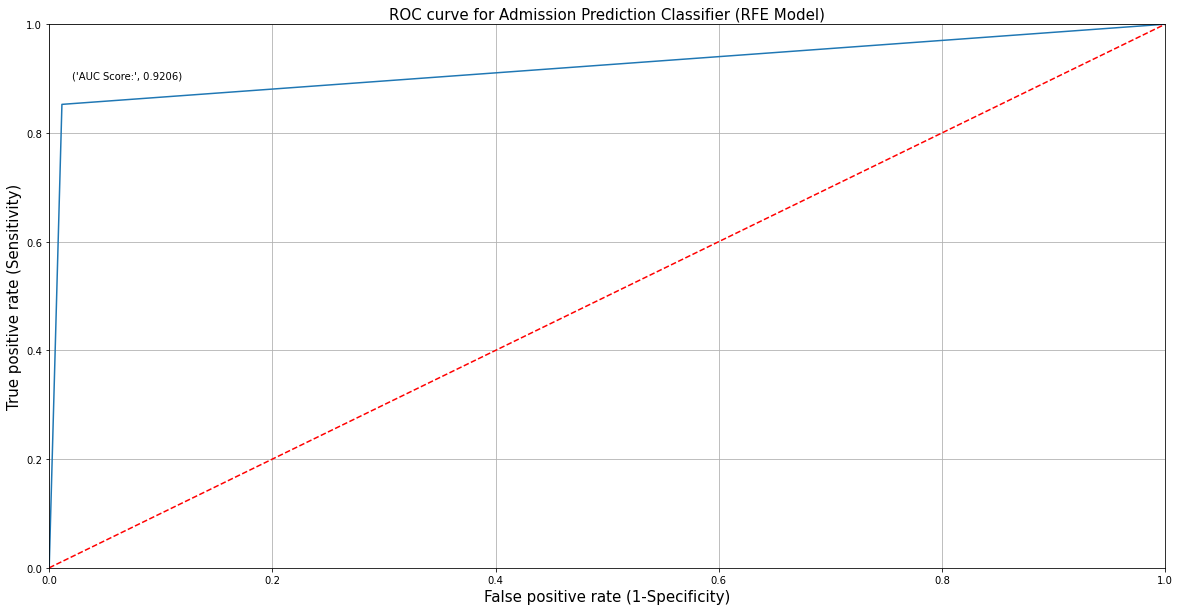

In [91]:
plt.figure(figsize=(20,10))

# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

Interpretation: The red dotted line represents the ROC curve of a purely random classifier.
- From the above plot, we can see that our final model is away from the dotted line; with the AUC score 0.9206.

## THE END ##